# Ejercicio 8

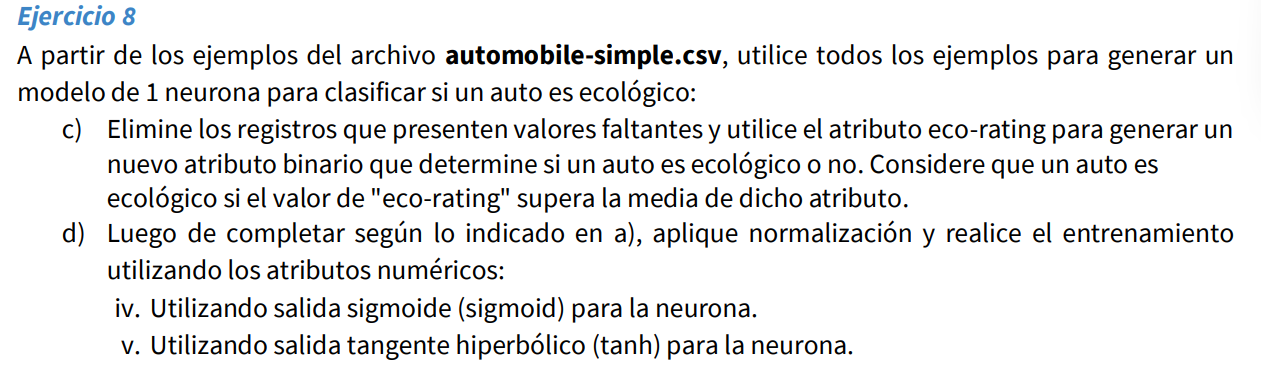

# Importe de librerias y lectura de datos

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [3]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo = DATOS_DIR + 'automobile-simple.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

df.head()

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459


### Tratamiento de datos nulos

In [4]:
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

### Creacion de atributo "es-ecologico"

In [7]:
media_ecorating = df['eco-rating'].mean()
df['es-ecologico'] = df['eco-rating'].apply(lambda x: 1 if x > media_ecorating else 0)
df.head()

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,es-ecologico
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462,0
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462,0
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272,0
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819,1
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459,0


### Encodeo de variables categoricas

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          197 non-null    object 
 1   fuel-type     197 non-null    object 
 2   num-of-doors  197 non-null    object 
 3   body-style    197 non-null    object 
 4   curb-weight   197 non-null    int64  
 5   engine-size   197 non-null    int64  
 6   horsepower    197 non-null    float64
 7   city-mpg      197 non-null    int64  
 8   highway-mpg   197 non-null    int64  
 9   price         197 non-null    float64
 10  volume        197 non-null    float64
 11  eco-rating    197 non-null    float64
 12  es-ecologico  197 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 21.5+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df[['make', 'fuel-type', 'num-of-doors','body-style']] = df[['make', 'fuel-type', 'num-of-doors','body-style']].apply(lambda col: label_encoder.fit_transform(col))
                                                                                                                      

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          197 non-null    int32  
 1   fuel-type     197 non-null    int32  
 2   num-of-doors  197 non-null    int32  
 3   body-style    197 non-null    int32  
 4   curb-weight   197 non-null    int64  
 5   engine-size   197 non-null    int64  
 6   horsepower    197 non-null    float64
 7   city-mpg      197 non-null    int64  
 8   highway-mpg   197 non-null    int64  
 9   price         197 non-null    float64
 10  volume        197 non-null    float64
 11  eco-rating    197 non-null    float64
 12  es-ecologico  197 non-null    int64  
dtypes: float64(4), int32(4), int64(5)
memory usage: 18.5 KB


Vemos ahora que todas las columnas son numericas

### Division en X e Y

In [15]:
datos  = np.array(df)
Y = datos[:,12].reshape(-1,1) #variable que quiero predecir
X = np.delete(datos, [12], 1) #elimino la variable target

### Normalizacion 

In [16]:
normalizador = preprocessing.StandardScaler()
X = normalizador.fit_transform(X)

### Modelo y entrenamiento con salida sigmoide

In [20]:
from ClassNeuronaGral import NeuronaGradiente
modelo_sigmoid = NeuronaGradiente(alpha=0.01, n_iter=100, FUN='sigmoid', COSTO='EC_binaria')

In [21]:
modelo_sigmoid.fit(X,Y)

In [22]:
pred  = modelo_sigmoid.predict(X)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Modelo y entrenamiento con salida hiperbolica

In [23]:
modelo_tanh = NeuronaGradiente(alpha=0.01, n_iter=100, FUN='tanh', COSTO='EC_binaria')

In [24]:
modelo_tanh.fit(X,Y)

c:\Users\VICTUS\Documents\2024\Deep Learning UNLP\03 - Optimización por gradiente\../Fuentes\ClassNeuronaGral.py:105: RuntimeWarning: invalid value encountered in log
  return(-y*np.log(y_hat+EPS)-(1-y)*np.log(1-y_hat+EPS))


In [25]:
pred = modelo_tanh.predict(X)
pred

array([ 1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1])